In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('diamonds.csv')
dados.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dados.rename(columns = {'carat':'Quilate', 'cut':'Corte', 'color':'Cor', 'clarity':'Claridade',
                        'depth':'Profundidade', 'table':'Mesa', 'price':'Preço', 'x':'C',
                        'y':'L', 'z':'P'}, inplace = True)

In [16]:
corte = {
    'Ideal':'Ideal',
    'Premium':'Prêmio',
    'Very Good':'Muito Bom',
    'Good':'Bom',
    'Fair':'Justo'
}

In [17]:
dados.Corte = dados.Corte.map(corte)

In [4]:
dados.Cor.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [5]:
dados.Claridade.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<AxesSubplot:ylabel='Claridade'>

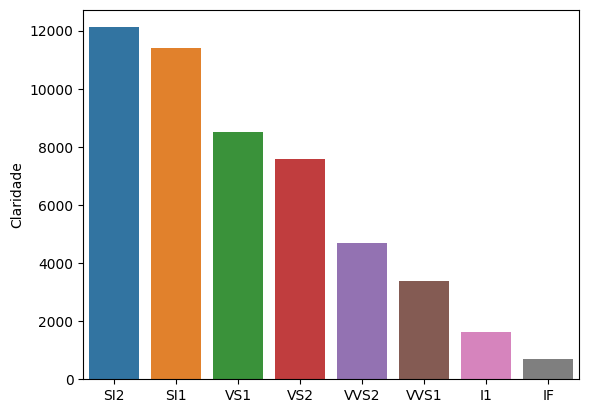

In [6]:
sns.barplot(x = dados.Claridade.unique(), y = dados.Claridade.value_counts(), data = dados)

<AxesSubplot:ylabel='Cor'>

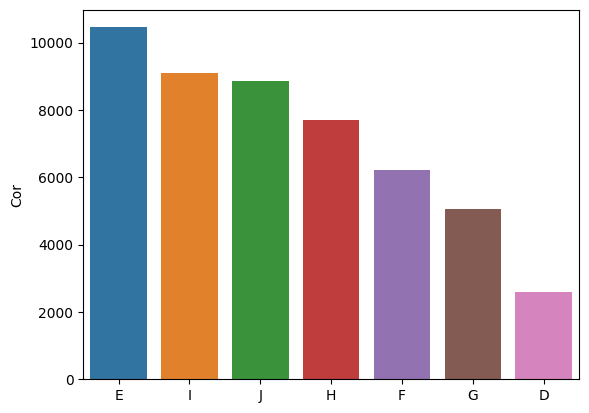

In [13]:
sns.barplot(data = dados, x = dados.Cor.unique(), y = dados.Cor.value_counts())

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Quilate       50000 non-null  float64
 1   Corte         50000 non-null  object 
 2   Cor           50000 non-null  object 
 3   Claridade     50000 non-null  object 
 4   Profundidade  50000 non-null  float64
 5   Mesa          50000 non-null  float64
 6   Preço         50000 non-null  int64  
 7   C             50000 non-null  float64
 8   L             50000 non-null  float64
 9   P             50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB
